<a href="https://colab.research.google.com/github/poandpo/project-/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기본 데이터 전처리

In [3]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [1]:
import pandas as pd

df= pd.read_csv('vgames2.csv', index_col=0) #df로 파일 불러오는데 인덱스를 숫자 있는 열(0행)로 지정
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [2]:
df.isnull().sum() # 결측치 확인
df['Year']=df['Year'].fillna(0).replace('N/A',0).astype(int) # Year 피쳐에 결측지 0으로 대체하고 N/A를 0으로 대체하고 정수형 타입으로 변환
df[['Genre','Publisher' ]]=df[['Genre','Publisher' ]].fillna('unknown') #Genre,Publisher 피쳐의 결측치를 unknown으로 대체
#df['Platform']=df['Platform'].replace('챕','e') 



In [3]:
def value_to_float(x):
    if 'K' in x:
       return float(x.replace('K', '')) * 0.001
    elif 'M' in x: 
       return float(x.replace('M', ''))
    else:
       return float(x)

df['NA_Sales']=df['NA_Sales'].apply(value_to_float)
df['EU_Sales']=df['EU_Sales'].apply(value_to_float)
df['JP_Sales']=df['JP_Sales'].apply(value_to_float)
df['Other_Sales']=df['Other_Sales'].apply(value_to_float)
#출고량 피쳐에서 'M'을 빼고 정수형으로 바꾸고, 'K'를 빼고 0,0001를 곱하여 단위를 맞춤

In [4]:
df.dtypes #타입 잘 바뀌었는지 확인

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [5]:
def value_to_year(x):
   if x in range(1,20):
      return x + 2000  
   elif x in range(80,100):
      return x + 1900   
   else :   
      return x

df['Year']=df['Year'].apply(value_to_year) # 97이나 9같은 한 두자리 숫자를 1997,2009으로 바꿈

In [6]:
df['Year'].iloc[81] # 잘 바뀌었는지 확인

1997

In [7]:
df['Total_sales']= df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df 
# 모든 지역 출고량의 합 피쳐를 만든

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


#지역에 따라서 선호하는 게임 장르가 다를까
1. 장르별로 모아서 각 나라의 출고량의 총합들 계산
2. 총합 시각화

In [8]:
df['Genre'].value_counts(dropna = False) # 장르별 빈도 

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
unknown           50
Name: Genre, dtype: int64

In [9]:
df_g= df.sort_values(by=['Genre'], axis=0).reset_index(drop=True)[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales' ]]


In [10]:
df_g

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.00,0.00,0.11,0.00
2,Action,0.29,0.28,0.00,0.06
3,Action,0.04,0.02,0.00,0.00
4,Action,0.16,0.05,0.00,0.02
...,...,...,...,...,...
16593,unknown,0.46,0.03,0.00,0.01
16594,unknown,5.17,4.05,4.34,0.79
16595,unknown,0.13,0.05,0.00,0.00
16596,unknown,0.00,0.02,0.00,0.00


In [11]:
a=df_g[df_g['Genre'].isin(['Action'])].sum()
b=df_g[df_g['Genre'].isin(['Sports'])].sum()
c=df_g[df_g['Genre'].isin(['Misc'])].sum()
d=df_g[df_g['Genre'].isin(['Role-Playing'])].sum()
e=df_g[df_g['Genre'].isin(['Shooter'])].sum()
f=df_g[df_g['Genre'].isin(['Adventure'])].sum()
g=df_g[df_g['Genre'].isin(['Racing'])].sum()
h=df_g[df_g['Genre'].isin(['Platform'])].sum()
i=df_g[df_g['Genre'].isin(['Simulation'])].sum()
j=df_g[df_g['Genre'].isin(['Fighting'])].sum()
k=df_g[df_g['Genre'].isin(['Strategy'])].sum()
l=df_g[df_g['Genre'].isin(['Puzzle'])].sum()


In [12]:
df_g_to=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l], axis=1) # 평균 구한것을 합쳐주기
df_g_to.columns=['Action','Sport','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']
# 컬럼명을 변경
df_g_to=df_g_to.T.drop(columns='Genre') #행과 열 전환
df_g_to

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,874.81,522.16,157.9,186.45
Sport,680.52,376.48,135.37,134.67
Misc,408.05,212.36,105.27,74.04
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65
Adventure,105.66,64.05,51.95,16.81
Racing,357.19,237.1,56.4,77.1
Platform,446.44,201.61,130.65,51.53
Simulation,182.96,113.35,63.7,31.48
Fighting,223.2,101.22,87.34,36.64


In [27]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [13]:
df_g_to.iloc[:,1]

Action          522.16
Sport           376.48
Misc            212.36
Role-Playing    183.58
Shooter         313.05
Adventure        64.05
Racing           237.1
Platform        201.61
Simulation      113.35
Fighting        101.22
Strategy         45.32
Puzzle           50.73
Name: EU_Sales, dtype: object

In [14]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')  

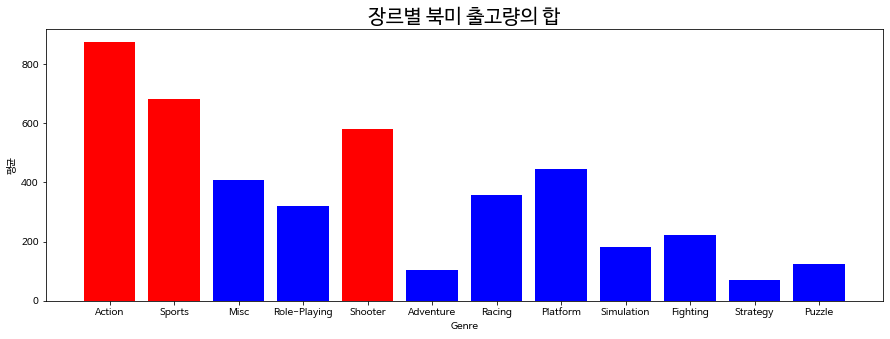

In [15]:
area_category=['Action','Sports','Misc','Role-Playing','Shooter','Adventure','Racing','Platform','Simulation','Fighting','Strategy','Puzzle']

plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,0], color=colors)

plt.title('장르별 북미 출고량의 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

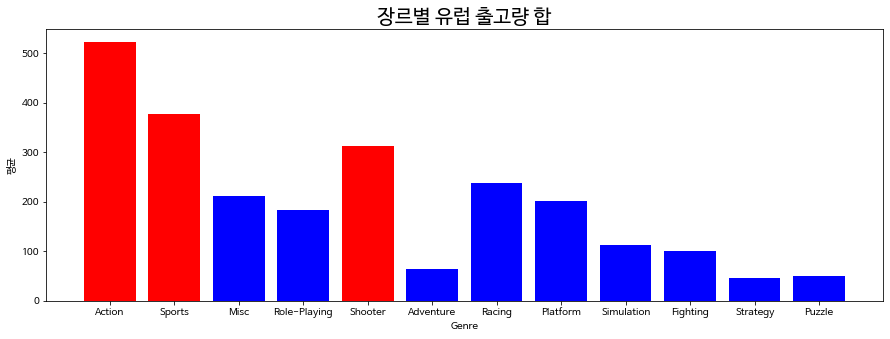

In [16]:


plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,1], color=colors)

plt.title('장르별 유럽 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

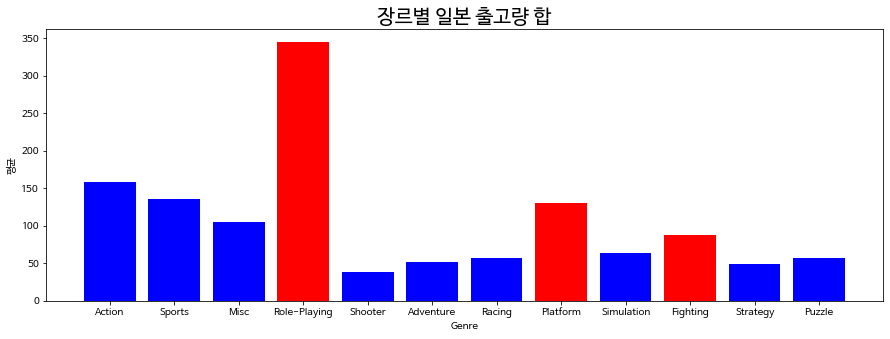

In [17]:


plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['b','b','b','r','b','b','b','r','b','r','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,2], color=colors)

plt.title('장르별 일본 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

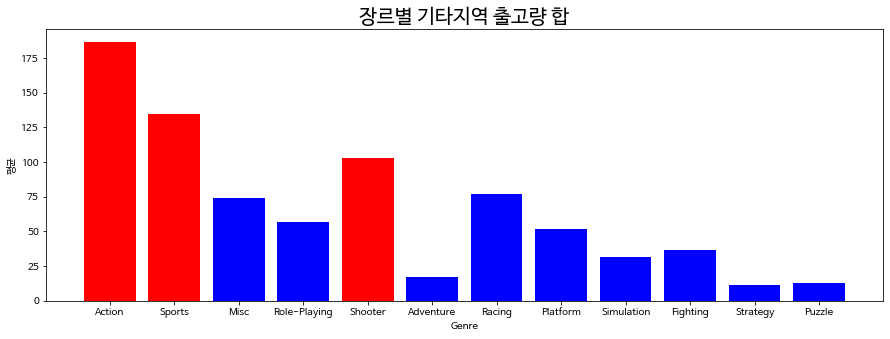

In [18]:


plt.figure(figsize=(15,5))

xtick_label_position = list(range(len(area_category))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, area_category)
colors=['r','r','b','b','r','b','b','b','b','b','b','b']

plt.bar(xtick_label_position, df_g_to.iloc[:,3], color=colors)

plt.title('장르별 기타지역 출고량 합',fontsize=20) ## 타이틀 출력
plt.xlabel('Genre') ## x축 라벨 출력
plt.ylabel('평균') ## y축 라벨 출력
plt.show()

북미와 유럽은 action, sport, shooter을 선호하는 반면,
일본은 Role-playing이 압도적으로 선호하는 것을 알 수 있다.

**가설1: 지역별 출고량의 총합들의 비율은 유사하다**

In [19]:
df_g_to_sum=df_g_to.sum()
df_g_to_sum

NA_Sales       4372.34
EU_Sales       2421.01
JP_Sales       1278.14
Other_Sales     792.21
dtype: float64

In [20]:
from scipy.stats import chisquare

chi1 = chisquare(df_g_to_sum, axis=None)
chi1

Power_divergenceResult(statistic=3429.0829413901647, pvalue=0.0)

Pvalue가 0.05로 귀무가설을 기각될 가능성이 높으므로 즉, 지역별 출고량의 총합들은 유사하지 않다.

**가설2: 지역별 출고량과 장르가 독립적이다(연관이 없다)**

In [21]:
df_g_to=df_g_to.astype('category')

In [22]:
from scipy.stats import chi2_contingency

chi2_val, p, dof, expected= chi2_contingency(df_g_to, correction=False) #Two-sample 카이제곱 검증함
print('Chi^2 값',': ',chi2_val.round(2),"\n")
if(p<0.05) : 
    print('귀무가설 H0를 기각한다.', 'p value:', p.round(2),"\n")
else :
    print('귀무가설 H0를 기각하지 못한다.', 'p value:', p.round(2),"\n")


Chi^2 값 :  696.8 

귀무가설 H0를 기각한다. p value: 0.0 



Pvalue가 0.05로 귀무가설을 기각될 가능성이 높으므로 즉, 장르와 지역별 출고량이 독립적이지 않다. 즉, 둘은 연관이 되어있음을 알수 있다

##총정리

시각화된 자료를 통해서 미국과 유럽은 비슷하나 일본은 매우 다르고, 가설 검증을 통해서 지역별 출고량과 장르가 연관이 되어있다. 

**즉, 지역에 따라서 선호하는 게임의 장르가 다르다는 것을 알 수 있다.**

#연도별 게임의 트렌드가 있을까?

In [24]:
df['Year'].value_counts(dropna = False) 

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     346
2016     344
1999     338
1997     289
0        274
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [25]:
df_Y=df.sort_values(by=['Year'], axis=0) #year피쳐 기준으로 정렬
df_Y

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_sales
4618,Hangman,2600,0,Puzzle,Atari,0.35,0.02,0.00,0.00,0.37
5161,Harvest Moon: The Tale of Two Towns,3DS,0,Simulation,Unknown,0.28,0.00,0.00,0.02,0.30
5176,Dance! It's Your Stage,Wii,0,Misc,DTP Entertainment,0.00,0.01,0.00,0.00,0.01
5231,Circus Atari,2600,0,Action,Atari,0.43,0.03,0.00,0.00,0.46
12418,Silent Hill: Homecoming,PS3,0,Action,Konami Digital Entertainment,0.18,0.15,0.00,0.06,0.39
...,...,...,...,...,...,...,...,...,...,...
6193,Azure Striker Gunvolt: Striker Pack,3DS,2016,Action,Inti Creates,0.00,0.00,0.01,0.00,0.01
10108,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
15234,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
5311,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


## 1.연도와 장르 선호도

In [26]:
eighty =range(1980,1990)

e_s=df_Y[df_Y['Year'].isin(eighty)].reset_index(drop=True) #205
A=e_s['Genre'].value_counts(dropna = False) 


In [27]:
nighty=range(1990,2000)

n_s=df_Y[df_Y['Year'].isin(nighty)].reset_index(drop=True) #1769
B=n_s['Genre'].value_counts(dropna = False)

In [28]:
noughties_1=range(2000,2010)

nou_s1=df_Y[df_Y['Year'].isin(noughties_1)].reset_index(drop=True) #4136
C=nou_s1['Genre'].value_counts(dropna = False) 

In [29]:
#noughties_2=range(2006,2010)

#nou_s2=df_Y[df_Y['Year'].isin(noughties_2)].reset_index(drop=True) #5069
#D=nou_s2['Genre'].value_counts(dropna = False) 

In [30]:
tens=range(2010,2021)
t1=df_Y[df_Y['Year'].isin(tens)].reset_index(drop=True) #5145
E=t1['Genre'].value_counts(dropna = False) 

In [31]:
df_Y_v=pd.concat([A,B,C,E], axis=1)
df_Y_v.columns=['80s','90s','2000s','2010s']
df_Y_v_1=df_Y_v.drop(labels = "unknown", axis = 0).transpose().reset_index()

df_Y_v_1


,index,Action,Platform,Shooter,Sports,Puzzle,Role-Playing,Misc,Racing,Fighting,Simulation,Adventure,Strategy
0,80s,66.0,33.0,30.0,22.0,19.0,9.0,8.0,8.0,4.0,3.0,2.0,NaN
1,90s,161.0,125.0,137.0,304.0,71.0,171.0,115.0,181.0,193.0,86.0,97.0,123.0
2,2000s,1579.0,564.0,717.0,1404.0,361.0,729.0,1021.0,797.0,442.0,551.0,632.0,378.0
3,2010s,1436.0,151.0,395.0,569.0,116.0,557.0,561.0,234.0,196.0,209.0,539.0,168.0


Text(0.5, 0, 'Year')

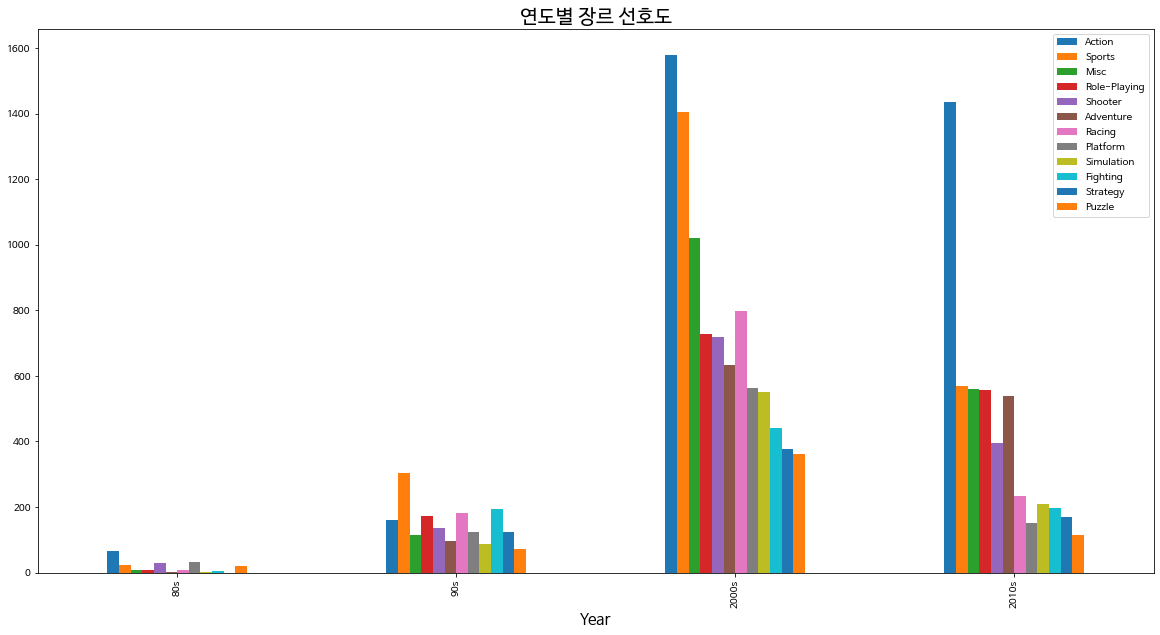

In [32]:
import seaborn as sns

df_Y_v_1.plot(x= 'index', y=area_category, kind="bar",figsize=(20,10)) 

plt.title('연도별 장르 선호도',fontsize=20) ## 타이틀 출력
plt.xlabel('Year',fontsize=15) ## x축 라벨 출력
#plt.ylabel('') ## y축 라벨 출력

##가설: 시대별 

In [60]:
df_Y_v.drop(labels = "unknown", axis = 0)

,80s,90s,2000s,2010s
Action,66.0,161,1579,1436
Platform,33.0,125,564,151
Shooter,30.0,137,717,395
Sports,22.0,304,1404,569
Puzzle,19.0,71,361,116
Role-Playing,9.0,171,729,557
Misc,8.0,115,1021,561
Racing,8.0,181,797,234
Fighting,4.0,193,442,196
Simulation,3.0,86,551,209


In [34]:
df_Y_v_s=df_Y_v.sum()
df_Y_v_s

80s       205.0
90s      1769.0
2000s    9205.0
2010s    5145.0
dtype: float64

In [36]:
from scipy.stats import chisquare
s,p2=chisquare(df_Y_v_s, axis=None)
if(p2<0.05) : 
    print('귀무가설 H0를 기각한다.', 'p value:', p2.round(2),"\n")
else :
    print('귀무가설 H0를 기각하지 못한다.', 'p value:', p2.round(2),"\n")

귀무가설 H0를 기각한다. p value: 0.0 



In [51]:
chi3_val, p3, dof3, expected3 = chi2_contingency(df_Y_t, correction=False)
print('Chi^2 값',': ',chi3_val.round(2),"\n")
if(p3<0.05) : 
    print('귀무가설 H0를 기각한다.', 'p value:', p3.round(2),"\n")
else :
    print('귀무가설 H0를 기각하지 못한다.', 'p value:', p3.round(2),"\n")


Chi^2 값 :  981.34 

귀무가설 H0를 기각한다. p value: 0.0 

